# CS5616 - NLP - A4 - Text Classification

## 209338R - KATS Jayathilaka

#### -----------------------------------------------------------------------------------------------------

### 1. Importing and downloading NLTK Library and importing all other libraries

In [151]:
import nltk
import os
import pandas as pd

#### You have to change this directory according to your system. Otherwise, nltk.download() will always be invoked.

In [152]:
# I am KATS Jayathilaka - SINGHABAHU is my nickname
NLTK_DATA_PATH_CHECK = '/home/singhabahu/nltk_data/'

In [153]:
if not os.path.exists(NLTK_DATA_PATH_CHECK):
    nltk.download()

### 2. Loading Raw Data

In [154]:
d_file = open('5000TravelQuestionsDataset.csv', encoding="latin-1")

df = pd.read_csv(d_file, header=None)
df.columns = ['text', 'class1', 'class2']

df.head()

,text,class1,class2
0,What are the special things we (husband and me...,TTD,TTDSIG
1,What are the companies which organize shark fe...,TTD,TTDOTH
2,Is it safe for female traveller to go alone to...,TGU,TGUHEA
3,What are the best places around Cape Town for ...,TTD,TTDSIG
4,What are the best places to stay for a family ...,ACM,ACMOTH


### 3. Preprocessing

#### 3.1.Removing mistakenly entered `class1` entries as follows.

In [123]:
# coarse classes
df['class1'].value_counts()

TGU      1217
TTD      1139
TRS      1011
ACM       720
FOD       521
ENT       214
WTH       172
TGU\n       3
\nENT       2
TTD\n       1
Name: class1, dtype: int64

In [124]:
df.groupby('class1').get_group('TGU\n')

,text,class1,class2
524,Has anyone planned a simple wedding by themsel...,TGU\n,TGUPLN
3145,What are the Trans-Mongolian stop recommendati...,TGU\n,TGUOTH
3333,What is a good Civil Ceremony Venue for a wedd...,TGU\n,TGUOTH


In [125]:
df.groupby('class1').get_group('\nENT')

,text,class1,class2
3750,What are the best areas of town this year for ...,\nENT,ENTFES
3751,What to do on Riverwalk at Christmas time ?,\nENT,ENTFES


In [126]:
df.groupby('class1').get_group('TTD\n')

,text,class1,class2
3710,what is the best Zoo in Denmark ?,TTD\n,TTDSIG


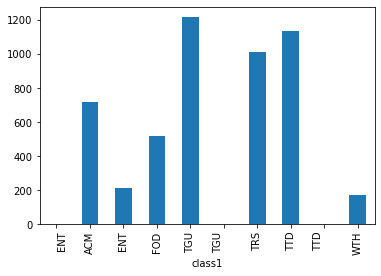

In [142]:
df.groupby('class1').text.count().plot.bar()

##### 3.1.1. Stripping trailing and leading whitespaces and linebreaks from `class1` column

In [145]:
df['class1'] = df['class1'].str.strip()

In [149]:
# Now there are exactly 7 classes visible.
df['class1'].value_counts()

TGU    1220
TTD    1140
TRS    1011
ACM     720
FOD     521
ENT     216
WTH     172
Name: class1, dtype: int64

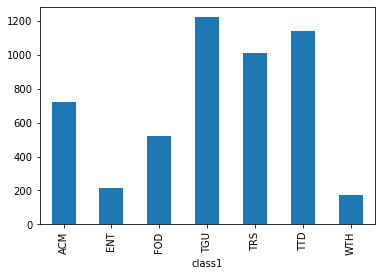

In [150]:
df.groupby('class1').text.count().plot.bar()